# 선형 최적화
- 선형 프로그래밍
- OR tools
- 참고: https://developers.google.com/optimization/introduction/python
- 예제: https://developers.google.com/optimization/examples

In [4]:
# !pip install ortools

     |████████████████████████████████| 28.3 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 11.3 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.9.2
    Uninstalling protobuf-3.9.2:
      Successfully uninstalled protobuf-3.9.2


In [1]:
import ortoolpy

## 간단한 예제
- Maximize 3x + y (목적함수)
- 제한조건

0≤ x ≤1  
0≤ y ≤2  
x + y ≤ 2  

In [2]:
from ortools.linear_solver import pywraplp

# 선형 프로그래밍 모델 생성 (GLOP를 백엔드로)
solver = pywraplp.Solver.CreateSolver('simple_lp_program', 'GLOP')

# 변수 선언, 변수의 범위 제약조건도 명시
# 0 < x < 1,  0 < y < 2 
x = solver.NumVar(0, 1, 'x')
y = solver.NumVar(0, 2, 'y')

print('Number of variables =', solver.NumVariables())

# 선형 제약조건 (계수 설정), 0 <= x + y <= 2.
ct = solver.Constraint(0, 2, 'ct')
ct.SetCoefficient(x, 1)
ct.SetCoefficient(y, 1)

print('Number of constraints =', solver.NumConstraints())

# 목적 함수 정의 (계수 설정) 및 최대화 지정: 3 * x + y.
objective = solver.Objective()
objective.SetCoefficient(x, 3)
objective.SetCoefficient(y, 1)
objective.SetMaximization()

solver.Solve()

print('Solution:')
print('Objective value =', objective.Value())
print('x =', x.solution_value())
print('y =', y.solution_value())

Number of variables = 2
Number of constraints = 1
Solution:
Objective value = 4.0
x = 1.0
y = 1.0


## 최적화 종류

- Linear optimization: 목적함수와 제한이 선형식으로 표현되는 경우  
- Constraint optimization: 임의의 제한 조건들을 타당하게 만족하는 해결책(조건)을 찾는 것이 목표이며 목적함수 최적화가 목표가 아님  
- Mixed-integer optimization: 변수가 모두 정수형인 경우 (작업 배정 문제 등)
- Bin packing: 콘테이너에 가능한 많은 물품을 쌓는 문제
- Network flows: 운송 방법 및 경로 최적화
- Assignment: 태스크를 에이전트에 배정하는 문제 (network flow의 특수한 경우)
- Scheduling: 여러 업무를 여러 장비에서 수행하는 문제
- Routing: 최적의 경로 찾기 문제, 트럭에 배정하는 문제

# 선형 프로그래밍 연습
- 목적함수: Maximize 3x + 4y
- 제한 조건  
x + 2y	≤	14  
3x – y	≥	0  
x – y	≤	2  

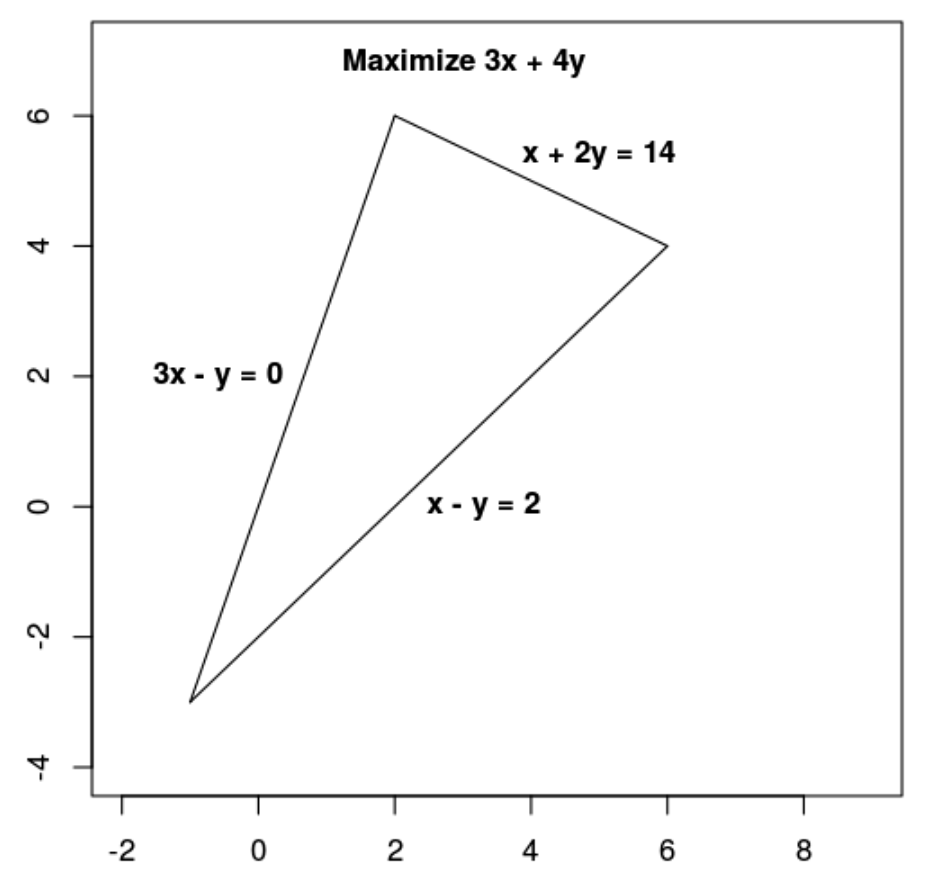

In [3]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('linear_programming_examples', 'GLOP')

# 양의 변수 정의
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

# Constraint 0: x + 2y <= 14.
constraint0 = solver.Constraint(-solver.infinity(), 14)
constraint0.SetCoefficient(x, 1)
constraint0.SetCoefficient(y, 2)

# Constraint 1: 3x - y >= 0.
constraint1 = solver.Constraint(0, solver.infinity())
constraint1.SetCoefficient(x, 3)
constraint1.SetCoefficient(y, -1)

# Constraint 2: x - y <= 2.
constraint2 = solver.Constraint(-solver.infinity(), 2)
constraint2.SetCoefficient(x, 1)
constraint2.SetCoefficient(y, -1)

# 목적함수: 3x + 4y.
objective = solver.Objective()
objective.SetCoefficient(x, 3)
objective.SetCoefficient(y, 4)
objective.SetMaximization()

# 풀이
solver.Solve()
opt_solution = 3 * x.solution_value() + 4 * y.solution_value()
print('Number of variables =', solver.NumVariables())
print('Number of constraints =', solver.NumConstraints())
# 최적 변수 보기
print('Solution:')
print('x = ', x.solution_value())
print('y = ', y.solution_value())
# 최적값 보기
print('Optimal objective value =', opt_solution)

Number of variables = 2
Number of constraints = 3
Solution:
x =  5.999999999999998
y =  3.9999999999999996
Optimal objective value = 33.99999999999999


## simplex 알고리즘
- 최적치는 꼭지점에 있다는 개념에서 최적치를 빠른 속도로 찾을 수 있다
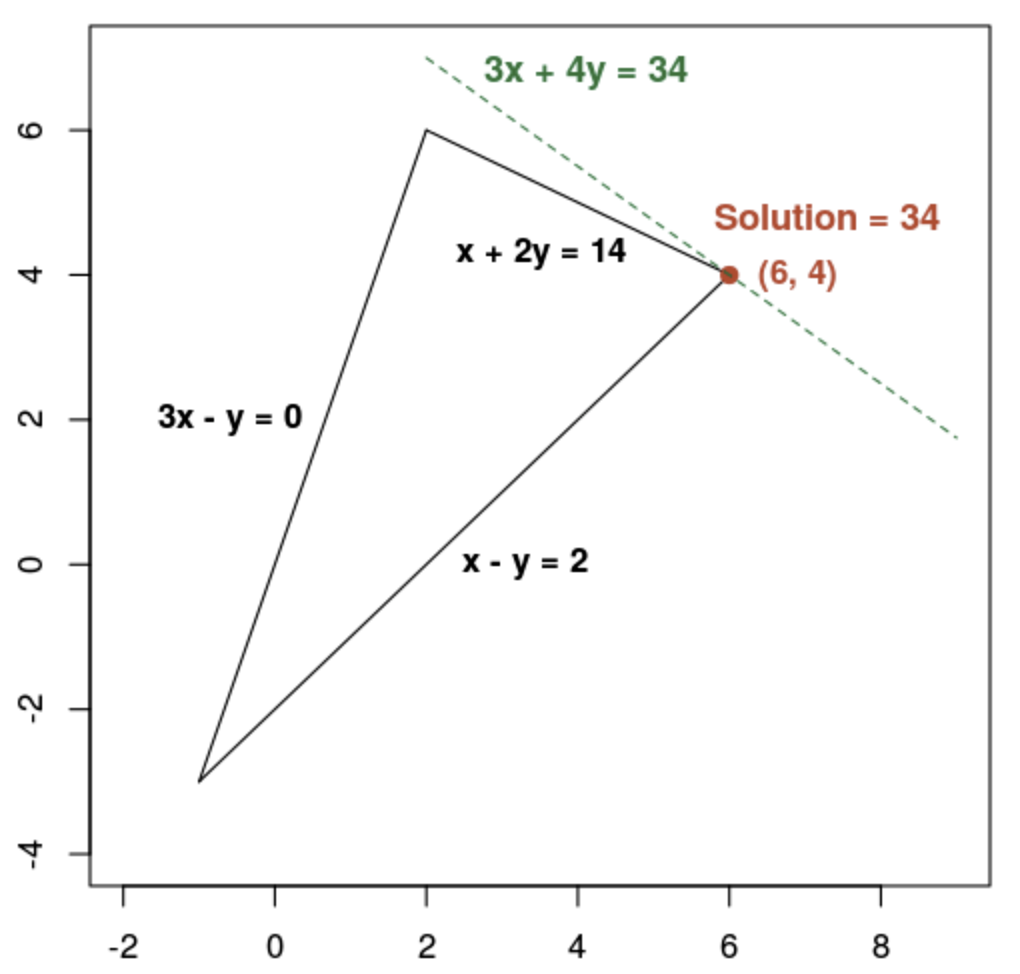

## Stigler diet 문제
- 아래 일일 영양 조건을 만족하면서 음식 구입 비용을 최소화 하는 문제
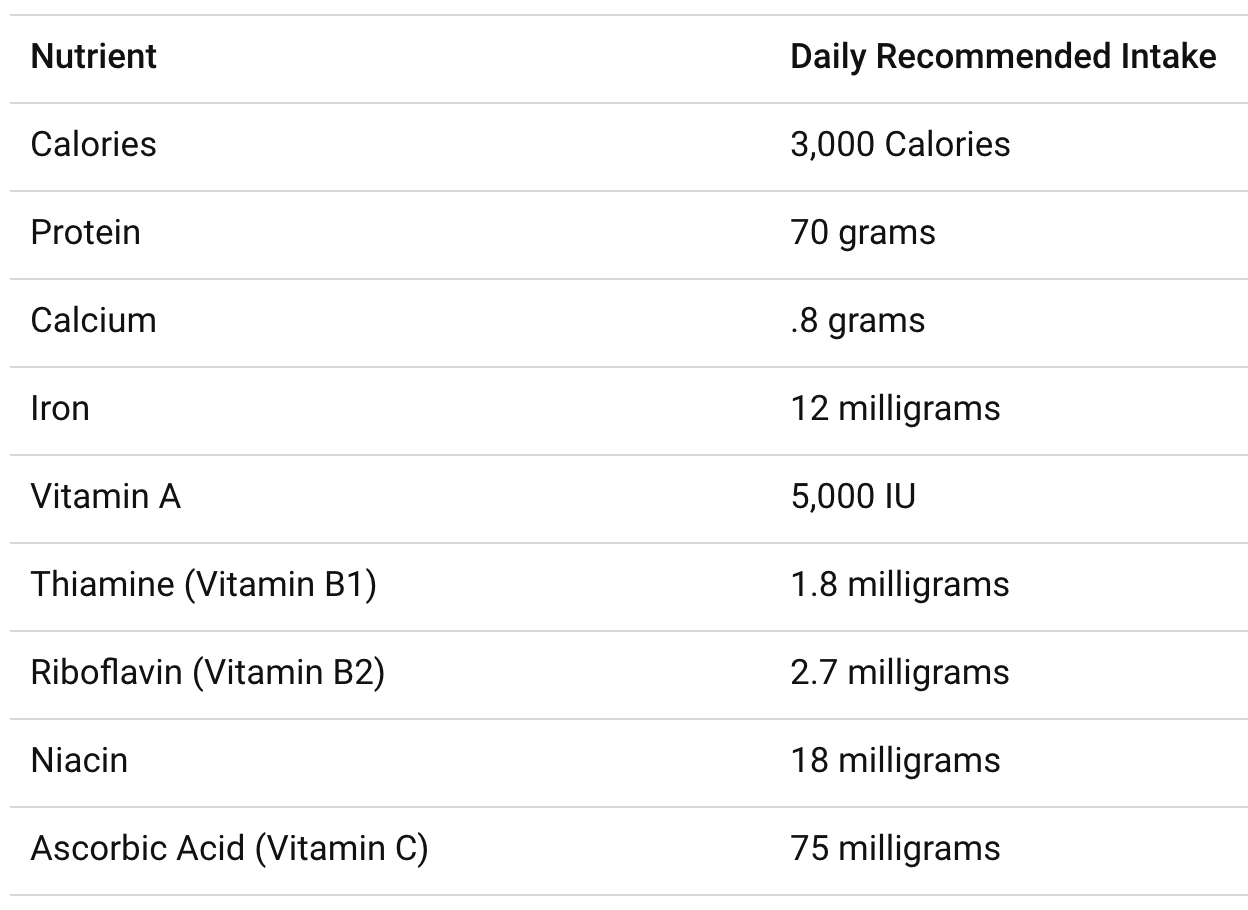

- 아래는 식품별 단가 및 영양 성분 (일부분임)
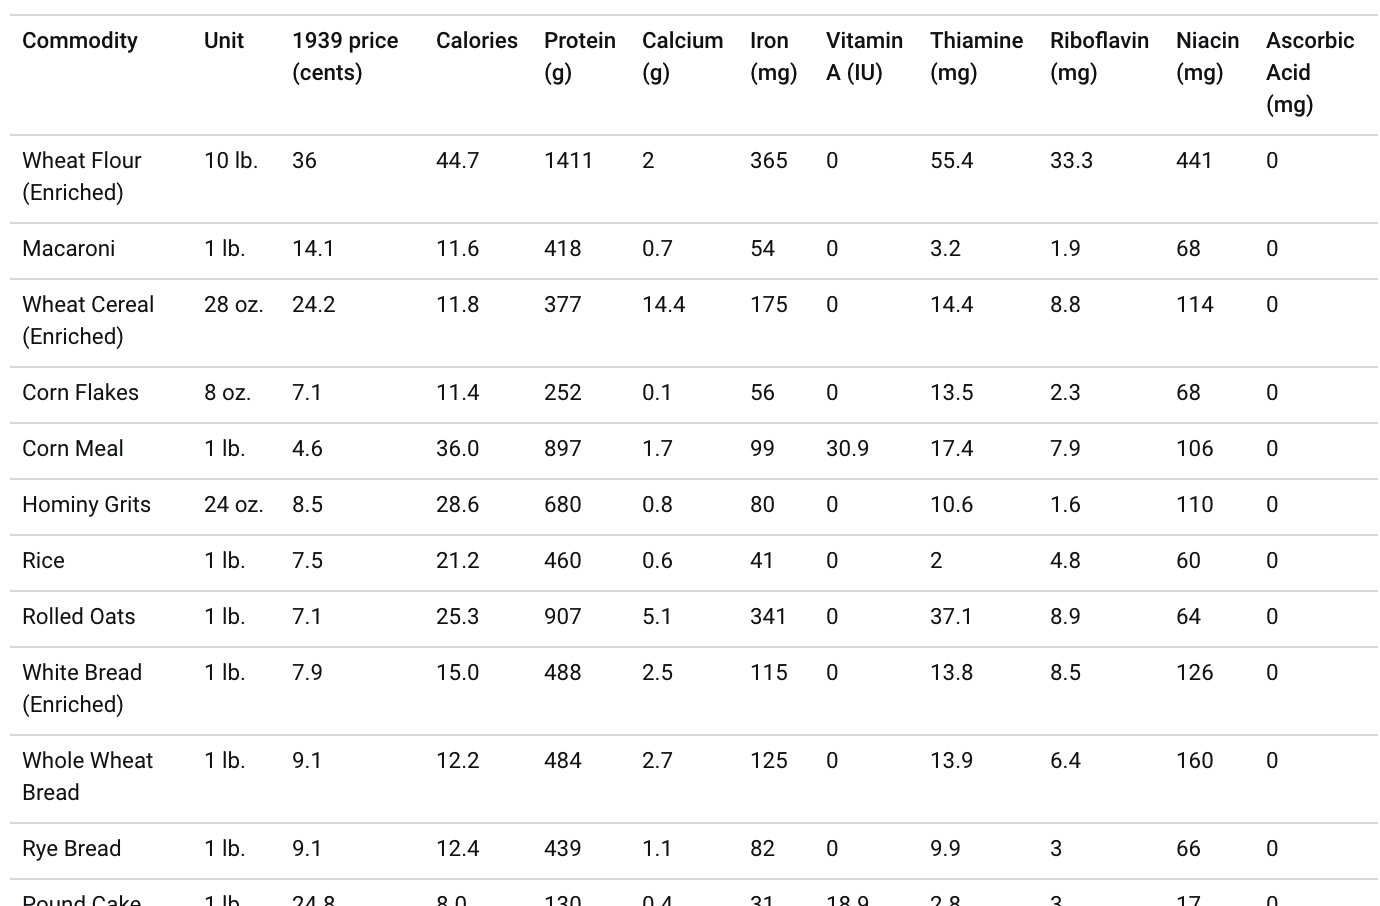

In [5]:
# 식품별 영양소 데이터
# Commodity, Unit, 1939 price (cents), Calories, Protein (g), Calcium (g), Iron (mg),
# Vitamin A (IU), Thiamine (mg), Riboflavin (mg), Niacin (mg), Ascorbic Acid (mg)

data = [
  ['Wheat Flour (Enriched)', '10 lb.', 36, 44.7, 1411, 2, 365, 0, 55.4, 33.3, 441, 0],
  ['Macaroni', '1 lb.', 14.1, 11.6, 418, 0.7, 54, 0, 3.2, 1.9, 68, 0],
  ['Wheat Cereal (Enriched)', '28 oz.', 24.2, 11.8, 377, 14.4, 175, 0, 14.4, 8.8, 114, 0],
  ['Corn Flakes', '8 oz.', 7.1, 11.4, 252, 0.1, 56, 0, 13.5, 2.3, 68, 0],
  ['Corn Meal', '1 lb.', 4.6, 36.0, 897, 1.7, 99, 30.9, 17.4, 7.9, 106, 0],
  ['Hominy Grits', '24 oz.', 8.5, 28.6, 680, 0.8, 80, 0, 10.6, 1.6, 110, 0],
  ['Rice', '1 lb.', 7.5, 21.2, 460, 0.6, 41, 0, 2, 4.8, 60, 0],
  ['Rolled Oats', '1 lb.', 7.1, 25.3, 907, 5.1, 341, 0, 37.1, 8.9, 64, 0],
  ['White Bread (Enriched)', '1 lb.', 7.9, 15.0, 488, 2.5, 115, 0, 13.8, 8.5, 126, 0],
  ['Whole Wheat Bread', '1 lb.', 9.1, 12.2, 484, 2.7, 125, 0, 13.9, 6.4, 160, 0],
  ['Rye Bread', '1 lb.', 9.1, 12.4, 439, 1.1, 82, 0, 9.9, 3, 66, 0],
  ['Pound Cake', '1 lb.', 24.8, 8.0, 130, 0.4, 31, 18.9, 2.8, 3, 17, 0],
  ['Soda Crackers', '1 lb.', 15.1, 12.5, 288, 0.5, 50, 0, 0, 0, 0, 0],
  ['Milk', '1 qt.', 11, 6.1, 310, 10.5, 18, 16.8, 4, 16, 7, 177],
  ['Evaporated Milk (can)', '14.5 oz.', 6.7, 8.4, 422, 15.1, 9, 26, 3, 23.5, 11, 60],
  ['Butter', '1 lb.', 30.8, 10.8, 9, 0.2, 3, 44.2, 0, 0.2, 2, 0],
  ['Oleomargarine', '1 lb.', 16.1, 20.6, 17, 0.6, 6, 55.8, 0.2, 0, 0, 0],
  ['Eggs', '1 doz.', 32.6, 2.9, 238, 1.0, 52, 18.6, 2.8, 6.5, 1, 0],
  ['Cheese (Cheddar)', '1 lb.', 24.2, 7.4, 448, 16.4, 19, 28.1, 0.8, 10.3, 4, 0],
  ['Cream', '1/2 pt.', 14.1, 3.5, 49, 1.7, 3, 16.9, 0.6, 2.5, 0, 17],
  ['Peanut Butter', '1 lb.', 17.9, 15.7, 661, 1.0, 48, 0, 9.6, 8.1, 471, 0],
  ['Mayonnaise', '1/2 pt.', 16.7, 8.6, 18, 0.2, 8, 2.7, 0.4, 0.5, 0, 0],
  ['Crisco', '1 lb.', 20.3, 20.1, 0, 0, 0, 0, 0, 0, 0, 0],
  ['Lard', '1 lb.', 9.8, 41.7, 0, 0, 0, 0.2, 0, 0.5, 5, 0],
  ['Sirloin Steak', '1 lb.', 39.6, 2.9, 166, 0.1, 34, 0.2, 2.1, 2.9, 69, 0],
  ['Round Steak', '1 lb.', 36.4, 2.2, 214, 0.1, 32, 0.4, 2.5, 2.4, 87, 0],
  ['Rib Roast', '1 lb.', 29.2, 3.4, 213, 0.1, 33, 0, 0, 2, 0, 0],
  ['Chuck Roast', '1 lb.', 22.6, 3.6, 309, 0.2, 46, 0.4, 1, 4, 120, 0],
  ['Plate', '1 lb.', 14.6, 8.5, 404, 0.2, 62, 0, 0.9, 0, 0, 0],
  ['Liver (Beef)', '1 lb.', 26.8, 2.2, 333, 0.2, 139, 169.2, 6.4, 50.8, 316, 525],
  ['Leg of Lamb', '1 lb.', 27.6, 3.1, 245, 0.1, 20, 0, 2.8, 3.9, 86, 0],
  ['Lamb Chops (Rib)', '1 lb.', 36.6, 3.3, 140, 0.1, 15, 0, 1.7, 2.7, 54, 0],
  ['Pork Chops', '1 lb.', 30.7, 3.5, 196, 0.2, 30, 0, 17.4, 2.7, 60, 0],
  ['Pork Loin Roast', '1 lb.', 24.2, 4.4, 249, 0.3, 37, 0, 18.2, 3.6, 79, 0],
  ['Bacon', '1 lb.', 25.6, 10.4, 152, 0.2, 23, 0, 1.8, 1.8, 71, 0],
  ['Ham, smoked', '1 lb.', 27.4, 6.7, 212, 0.2, 31, 0, 9.9, 3.3, 50, 0],
  ['Salt Pork', '1 lb.', 16, 18.8, 164, 0.1, 26, 0, 1.4, 1.8, 0, 0],
  ['Roasting Chicken', '1 lb.', 30.3, 1.8, 184, 0.1, 30, 0.1, 0.9, 1.8, 68, 46],
  ['Veal Cutlets', '1 lb.', 42.3, 1.7, 156, 0.1, 24, 0, 1.4, 2.4, 57, 0],
  ['Salmon, Pink (can)', '16 oz.', 13, 5.8, 705, 6.8, 45, 3.5, 1, 4.9, 209, 0],
  ['Apples', '1 lb.', 4.4, 5.8, 27, 0.5, 36, 7.3, 3.6, 2.7, 5, 544],
  ['Bananas', '1 lb.', 6.1, 4.9, 60, 0.4, 30, 17.4, 2.5, 3.5, 28, 498],
  ['Lemons', '1 doz.', 26, 1.0, 21, 0.5, 14, 0, 0.5, 0, 4, 952],
  ['Oranges', '1 doz.', 30.9, 2.2, 40, 1.1, 18, 11.1, 3.6, 1.3, 10, 1998],
  ['Green Beans', '1 lb.', 7.1, 2.4, 138, 3.7, 80, 69, 4.3, 5.8, 37, 862],
  ['Cabbage', '1 lb.', 3.7, 2.6, 125, 4.0, 36, 7.2, 9, 4.5, 26, 5369],
  ['Carrots', '1 bunch', 4.7, 2.7, 73, 2.8, 43, 188.5, 6.1, 4.3, 89, 608],
  ['Celery', '1 stalk', 7.3, 0.9, 51, 3.0, 23, 0.9, 1.4, 1.4, 9, 313],
  ['Lettuce', '1 head', 8.2, 0.4, 27, 1.1, 22, 112.4, 1.8, 3.4, 11, 449],
  ['Onions', '1 lb.', 3.6, 5.8, 166, 3.8, 59, 16.6, 4.7, 5.9, 21, 1184],
  ['Potatoes', '15 lb.', 34, 14.3, 336, 1.8, 118, 6.7, 29.4, 7.1, 198, 2522],
  ['Spinach', '1 lb.', 8.1, 1.1, 106, 0, 138, 918.4, 5.7, 13.8, 33, 2755],
  ['Sweet Potatoes', '1 lb.', 5.1, 9.6, 138, 2.7, 54, 290.7, 8.4, 5.4, 83, 1912],
  ['Peaches (can)', 'No. 2 1/2', 16.8, 3.7, 20, 0.4, 10, 21.5, 0.5, 1, 31, 196],
  ['Pears (can)', 'No. 2 1/2', 20.4, 3.0, 8, 0.3, 8, 0.8, 0.8, 0.8, 5, 81],
  ['Pineapple (can)', 'No. 2 1/2', 21.3, 2.4, 16, 0.4, 8, 2, 2.8, 0.8, 7, 399],
  ['Asparagus (can)', 'No. 2', 27.7, 0.4, 33, 0.3, 12, 16.3, 1.4, 2.1, 17, 272],
  ['Green Beans (can)', 'No. 2', 10, 1.0, 54, 2, 65, 53.9, 1.6, 4.3, 32, 431],
  ['Pork and Beans (can)', '16 oz.', 7.1, 7.5, 364, 4, 134, 3.5, 8.3, 7.7, 56, 0],
  ['Corn (can)', 'No. 2', 10.4, 5.2, 136, 0.2, 16, 12, 1.6, 2.7, 42, 218],
  ['Peas (can)', 'No. 2', 13.8, 2.3, 136, 0.6, 45, 34.9, 4.9, 2.5, 37, 370],
  ['Tomatoes (can)', 'No. 2', 8.6, 1.3, 63, 0.7, 38, 53.2, 3.4, 2.5, 36, 1253],
  ['Tomato Soup (can)', '10 1/2 oz.', 7.6, 1.6, 71, 0.6, 43, 57.9, 3.5, 2.4, 67, 862],
  ['Peaches, Dried', '1 lb.', 15.7, 8.5, 87, 1.7, 173, 86.8, 1.2, 4.3, 55, 57],
  ['Prunes, Dried', '1 lb.', 9, 12.8, 99, 2.5, 154, 85.7, 3.9, 4.3, 65, 257],
  ['Raisins, Dried', '15 oz.', 9.4, 13.5, 104, 2.5, 136, 4.5, 6.3, 1.4, 24, 136],
  ['Peas, Dried', '1 lb.', 7.9, 20.0, 1367, 4.2, 345, 2.9, 28.7, 18.4, 162, 0],
  ['Lima Beans, Dried', '1 lb.', 8.9, 17.4, 1055, 3.7, 459, 5.1, 26.9, 38.2, 93, 0],
  ['Navy Beans, Dried', '1 lb.', 5.9, 26.9, 1691, 11.4, 792, 0, 38.4, 24.6, 217, 0],
  ['Coffee', '1 lb.', 22.4, 0, 0, 0, 0, 0, 4, 5.1, 50, 0],
  ['Tea', '1/4 lb.', 17.4, 0, 0, 0, 0, 0, 0, 2.3, 42, 0],
  ['Cocoa', '8 oz.', 8.6, 8.7, 237, 3, 72, 0, 2, 11.9, 40, 0],
  ['Chocolate', '8 oz.', 16.2, 8.0, 77, 1.3, 39, 0, 0.9, 3.4, 14, 0],
  ['Sugar', '10 lb.', 51.7, 34.9, 0, 0, 0, 0, 0, 0, 0, 0],
  ['Corn Syrup', '24 oz.', 13.7, 14.7, 0, 0.5, 74, 0, 0, 0, 5, 0],
  ['Molasses', '18 oz.', 13.6, 9.0, 0, 10.3, 244, 0, 1.9, 7.5, 146, 0],
  ['Strawberry Preserves', '1 lb.', 20.5, 6.4, 11, 0.4, 7, 0.2, 0.2, 0.4, 3, 0]];

# 최소 영양 제한 조건
nutrients = [
    ['Calories (1000s)', 3],
    ['Protein (grams)', 70],
    ['Calcium (grams)', 0.8],
    ['Iron (mg)', 12],
    ['Vitamin A (1000 IU)', 5],
    ['Vitamin B1 (mg)', 1.8],
    ['Vitamin B2 (mg)', 2.7],
    ['Niacin (mg)', 18],
    ['Vitamin C (mg)', 75]]

In [6]:
len(data), len(nutrients)

(77, 9)

In [7]:
solver = pywraplp.Solver('SolveStigler',
                       pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
# 영양 정보를 담을 배열 정의
food = [[]] * len(data)
print(food)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [8]:
# 목적 함수: 식품 가격의 합 최소화
objective = solver.Objective()
for i in range(0, len(data)):
    # 각 행에 대해서 음식 i를 소비하는 비용, food[i] 계산
    food[i] = solver.NumVar(0.0, solver.infinity(), data[i][0])
    # 목적함수의 모든 계수를 1로 설정 (1달러)
    objective.SetCoefficient(food[i], 1)

# 비용 최소화 문제 
objective.SetMinimization()

# 제한 조건: 음식 영양소의 합이 일일 최소 영양분 조건 nutrients[i][1] 이상이 되어야 한다
# food[j] 변수에 담는다
# 식품 j가 공급하는 영양소 i의 량은 1 달러당 data[j][i+3] 이다.
# food[j]에는 식품에 지불되는 비용이 들어 있다
constraints = [0] * len(nutrients)
constraints

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
for i in range(0, len(nutrients)):
    constraints[i] = solver.Constraint(nutrients[i][1], solver.infinity())
    for j in range(0, len(data)):
        constraints[i].SetCoefficient(food[j], data[j][i+3])

# 풀이
status = solver.Solve()

In [10]:
len(data[0])

12

In [11]:
# 답을 찾은 경우
if status == solver.OPTIMAL:
    # Display the amounts (in dollars) to purchase of each food.
    price = 0
    num_nutrients = len(nutrients)
    nutrients = [0] * num_nutrients
    for i in range(0, len(data)):
        price += food[i].solution_value()

        for nutrient in range(0, num_nutrients):
            nutrients[nutrient] += data[i][nutrient+3] * food[i].solution_value()

        if food[i].solution_value() > 0:
            print('%s = %f' % (data[i][0], food[i].solution_value()))

    print('Optimal annual price: $%.2f' % (365 * price))

else:  # 답을 찾지 못한 경우
    if status == solver.FEASIBLE:
        print('A potentially suboptimal solution was found.')
    else:
        print('The solver could not solve the problem.')

Wheat Flour (Enriched) = 0.029519
Liver (Beef) = 0.001893
Cabbage = 0.011214
Spinach = 0.005008
Navy Beans, Dried = 0.061029
Optimal annual price: $39.66
